# Blending High Extraction and Low Extraction Flours

The [Tartine method][Tartine3] calls for wheat flours at various extraction levels which
are not easy to purchase. They can, however, be created by blending low and
high extraction flour. The
[Hamelman Challenge, Tech. Note: High Extraction Flour][Hamelman Challenge]
provides a method for blending whole wheat (100% extraction) and typical bread
flour (~70% extraction) to achieve the desired High Extraction Flour (85%).

I found a [bread flour][Azure Bread Flour] from [Azure Standard] with a flavor
and color I enjoy. The Unifine milling process reduces the bran and germ to small enough particles that they are not noticeable in the texture. Oven spring is good, but the air-pockets are not large, unlike [Tartine][Tartine3] bread. The texture is good but a little dense. 

The [Azure Bread Flour] extraction (90%) is higher than the recommended 85% for High-Extraction and 75% for Medium-Strong. So assuming my turning and forming skills are not to blame (*dubious assumption*), I'm going to try blending flours  to achieve the recommended extraction.

Blending the bread flour with All-Purpose flour (70–75% extraction) provides a simple solution, but we'll have to guess at the extraction rate since it is not usually reported on the label. [Azure Standard] has an [unenriched All-Purpose Flour][Azure All-Purpose Flour], which we'll assume is 72% extraction. Since the target extraction rate ranges between 75 and 85%, assuming 72% for the All-Purpose flour seems a reasonable middle-ground.

We can avoid any questions about whether enriching is healthy since the bread flour and the whole grain flours typical of [Tartine][Tartine3] recipes should compensate for any nutrients removed from the All-Purpose flour. The amount of All-Purpose flour required is a small fraction (~6%) of the total flour.

Taking an approach similar to the [Hamelman Challenge], we'll estimate extraction by adding the weight of All-Purpose flour to the total grain weight (denominator of the equation). Since we're not adding any bran or germ, the numerator only includes the weight of bread flour.

[Tartine3]: https://books.google.com/books/about/Tartine_Book_No_3.html?id=iS_UAAAAQBAJ "Tartine Book No. 3: Modern Ancient Classic Whole"

[Hamelman Challenge]: http://hamelmanchallenge.blogspot.com/2010/06/tech-note-high-extraction-flour.html "Tech. Note: High Extraction Flour"

[Azure Bread Flour]: https://www.azurestandard.com/shop/product/food/flour/white/wheat/unbleached-bread-flour-ultra-unifine-organic/20260?package=FL403 "Azure Market Organics Unbleached Bread Flour (Ultra Unifine), Organic"

[Azure Standard]: https://www.azurestandard.com "Azure Standard of Healthy and Abundant Living"

[Azure All-Purpose Flour]: https://www.azurestandard.com/shop/product/food/flour/unbleached-flour/all-purpose-flour-unbleached-organic/11444?package=FL080 "Azure Market Organics All Purpose Flour Unbleached, Organic"

In [6]:
from IPython.display import display, Math, Latex
from sympy.plotting import plot
import sympy as sym

sym.init_printing() # LaTeX formatted output

The math is a fairly straightforward mass-balance or weighted average:

Let:

$b$
:   Subscript for bread flour

$a$
:   Subscript for All-Purpose flour

$T$
:   Subscript for Target (desired) extraction flour

$m$
:   mass of flour

$E$
:   Extraction fraction (i.e., percentage/100)—if you're using a spreadsheet, just type `%` after the percentage.

$$
\begin{aligned}
    \frac{m_b}{E_b} + \frac{m_a}{E_a} &= \frac{m_T}{E_T} \\
          m_b + m_a &= m_T \\
\end{aligned}
$$
The first equation is the total mass of grain, and the second is the mass of flour.

Using a little bit of the Algebra, we were never going to use after high school (actually sympy is doing the work), we'll subtract the left side from the right to put the equations into a format sympy can solve:

In [7]:
ET, Eb, Ea, mT = sym.symbols('E_T, E_b, E_a, m_T')
ma, mb = sym.symbols('m_a, m_b')

E1 =  mT / ET - mb / Eb - ma /Ea
E2 = mT - mb - ma
sols = sym.solve([E1, E2], [mb, ma])

sols[mb] = sols[mb].simplify()

display(Math(data=r'\text{The equations become:}'),
        Math(data=sym.latex(E1)),
        Math(data=sym.latex(E2)),
        Math(data=r'\text{The solution is:}'),
        Math(data=sym.latex(sols))
       )

mb = (sols[mb]).factor()
ma = (sols[ma]).factor()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

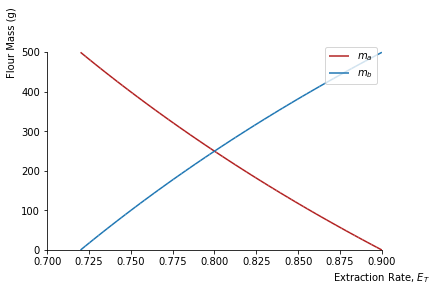

In [8]:
subs = dict([
             ('E_b', 0.90),
             ('E_a', 0.72),
             ('m_T', 500.0),
            ])
plt = plot(ma.subs(subs), mb.subs(subs), ('E_T', 0.72, 0.90), show=False, )
plt[0].line_color = 'firebrick'
plt[0].label = '$m_a$'
plt[1].label = '$m_b$'
plt.xlabel = 'Extraction Rate, $E_T$'
plt.xlim = (0.70, 0.9)
plt.ylabel = 'Flour Mass (g)'
plt.axis_center = (0.70, 0)
plt.legend = True
plt.show()

## Example 1: High-Extraction Flour Blend

For 500 g ($m_T$) of high-extraction flour:

In [9]:
subs = dict([('E_T', 0.85),
             ('E_b', 0.90),
             ('E_a', 0.72),
             ('m_T', 500.0),
            ])

def display_blend(subs=subs, ma=ma, mb=mb):
    '''Display the bread and All-Purpose flour blend'''
    
    result = dict([('m_a', round(ma.subs(subs),0)),
                   ('m_b', round(mb.subs(subs),0))])
    result['m_T'] = result['m_a'] + result['m_b']

    display(Math(data=r'\text{For:}'), Math(data=sym.latex(subs)),
            Math(data=r'\text{the flour blend should be:}'), 
            Math(data=sym.latex(result)))

    assert result['m_T'] == subs['m_T']

display_blend()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Example 2: Medium-Strong Wheat Flour Blend

For 500 g ($m_T$) of medium-strong wheat flour:

In [10]:
subs = dict([('E_T', 0.75),
             ('E_b', 0.90),
             ('E_a', 0.72),
             ('m_T', 500.0),
            ])

display_blend(subs=subs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Results

Time to bake some bread and see....